In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import sklearn
from IPython.display import display

In [2]:
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [4]:
iris_dataset.keys()

dict_keys(['feature_names', 'data', 'target', 'target_names', 'DESCR'])

In [5]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [6]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
type(iris_dataset['data'])

numpy.ndarray

In [8]:
iris_dataset['data'].shape

(150, 4)

In [9]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11272bbe0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1159553c8>]], dtype=object)

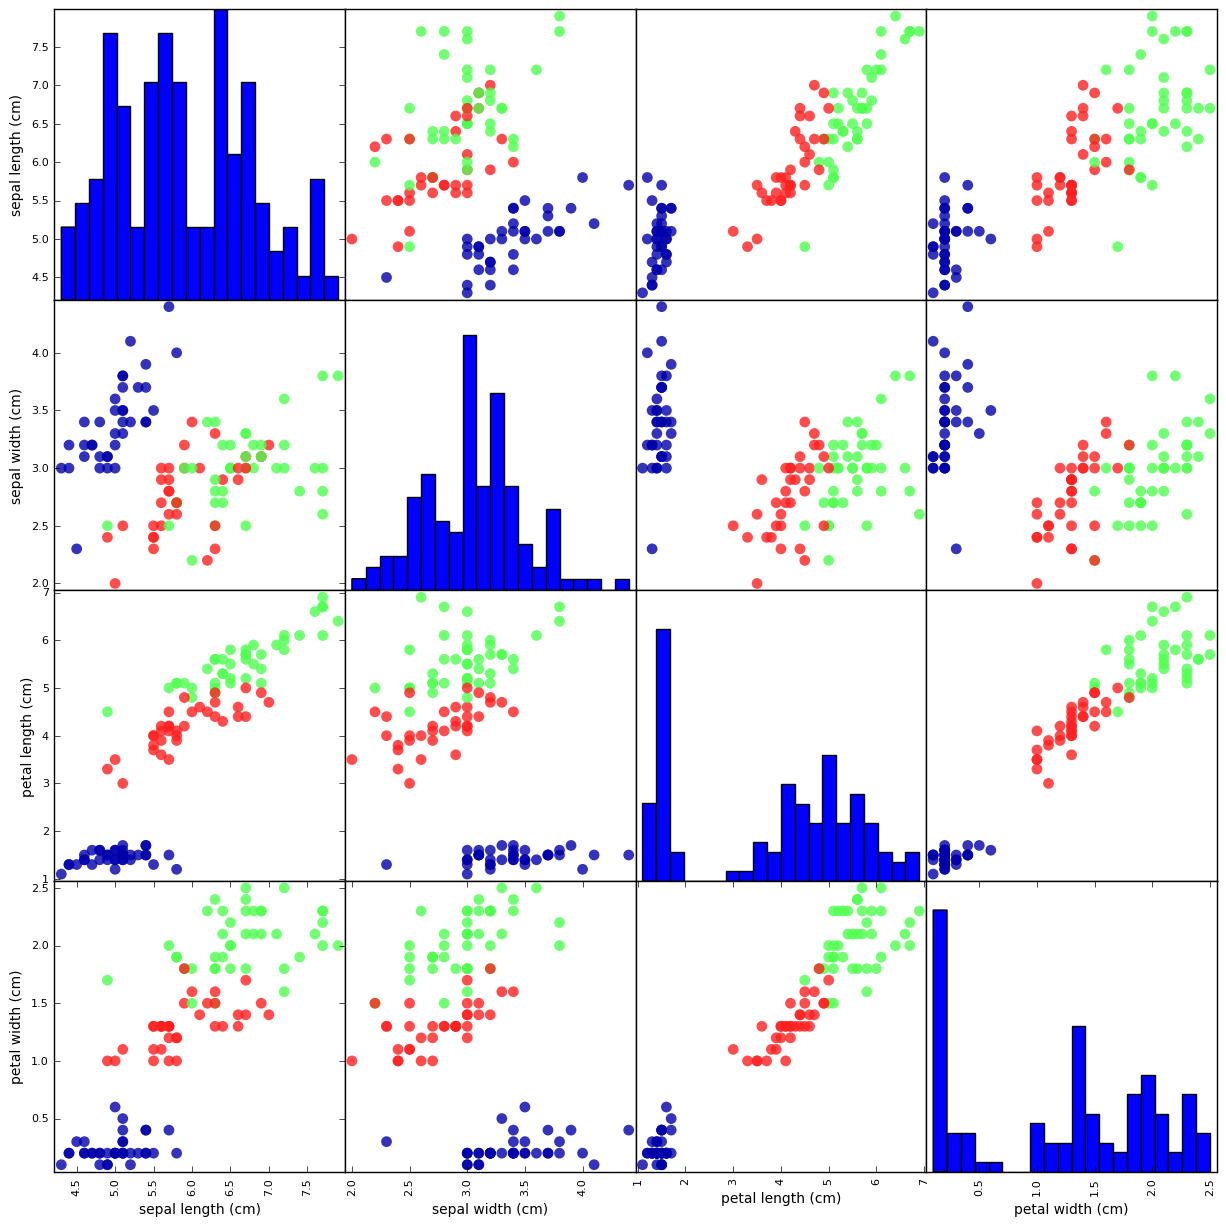

In [10]:
# Create pair-plots to visualize how the features relate to each other
# where the four features here are sepal length, sepal width, 
# petal length, and petal width.
# The colors represent the three Iris species.
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
                               marker='o', hist_kwds={'bins': 20}, s=60,
                               alpha=.8, cmap=mglearn.cm3)
# We see that the three classes seem to be fairly well seperated by the
# measurements, and therefore a machine learning model will likely be
# able to learn to seperate them.

In [11]:
# Use the classification algorithm k-nearest neighbors.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

# knn object encapsulates the algorithm that will be used to build the 
# model from the training data, as well the algorithm to make predictions
# on new data points. Will also hold information that the algorithm
# has extracted from the training data.

In [13]:
# Next need build the model on the training set. 
# To do this, call the `fit` method of the knn object. 
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [14]:
# Now can make predictions using this model on new data. 
# Suppose found an Iris with a sepal length of 5 cm, 
# a sepal width of 2.9 cm, a petal length of 1 cm, and a petal width 
# of 0.2 cm. What species is it? 

# First represent the features of the new Iris sample as a numpy array.
X_new = np.array([[5, 2.9, 1, 0.2]])

In [15]:
# Now make the prediction.
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


In [16]:
# But how do we know this is right? We need to TEST the model with
# our test set with known answers.
y_pred = knn.predict(X_test)

In [17]:
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [19]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

#or

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97
Test set score: 0.97
